## Supply Chain Backorder Forecasting 

Efficient inventory management is a crucial component of successful supply chain operations. As businesses strive to meet customer demands while minimizing holding costs, accurate demand forecasting emerges as a vital enabler. Traditional forecasting methods often struggle to capture the complexity of dynamic market conditions, leading researchers and practitioners to explore advanced techniques such as machine learning (ML). 
A backorder occurs when a customer orders a product that is temporarily out of stock, leading to a delay in fulfillment. In inventory management, predicting backorders is essential to maintain customer satisfaction, optimize supply chain efficiency, and minimize lost sales. By accurately forecasting backorders, businesses can better manage inventory levels, ensure timely replenishment, and prevent disruptions, thus balancing the demand-supply equation and improving overall operational efficiency.

#### Importing the training data

In [43]:
import pandas as pd
train_data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem2/RPL/Kaggle_Training_Dataset.csv',low_memory=False)
train_data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


#### Checking for NULL values

In [44]:
train_data.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

#### Handling the NULL values by replacing them by mean

In [45]:
import numpy as np

train_data['lead_time'].fillna(np.mean(train_data['lead_time']), inplace=True)

#### Dropping the rest of the NULL values

In [46]:
train_data.dropna(inplace=True)

#### Changing the index to SKU value

In [47]:
train_data.index = train_data.sku
train_data.drop('sku', axis=1, inplace=True)

#### Checking for duplicates and dropping the same

In [48]:
print(train_data.duplicated().sum())
train_data=train_data.drop_duplicates()

667552


#### Comparing Categorical Features

Text(0.5, 0.9, 'COMPARISION OF CATEGORICAL FEATURES')

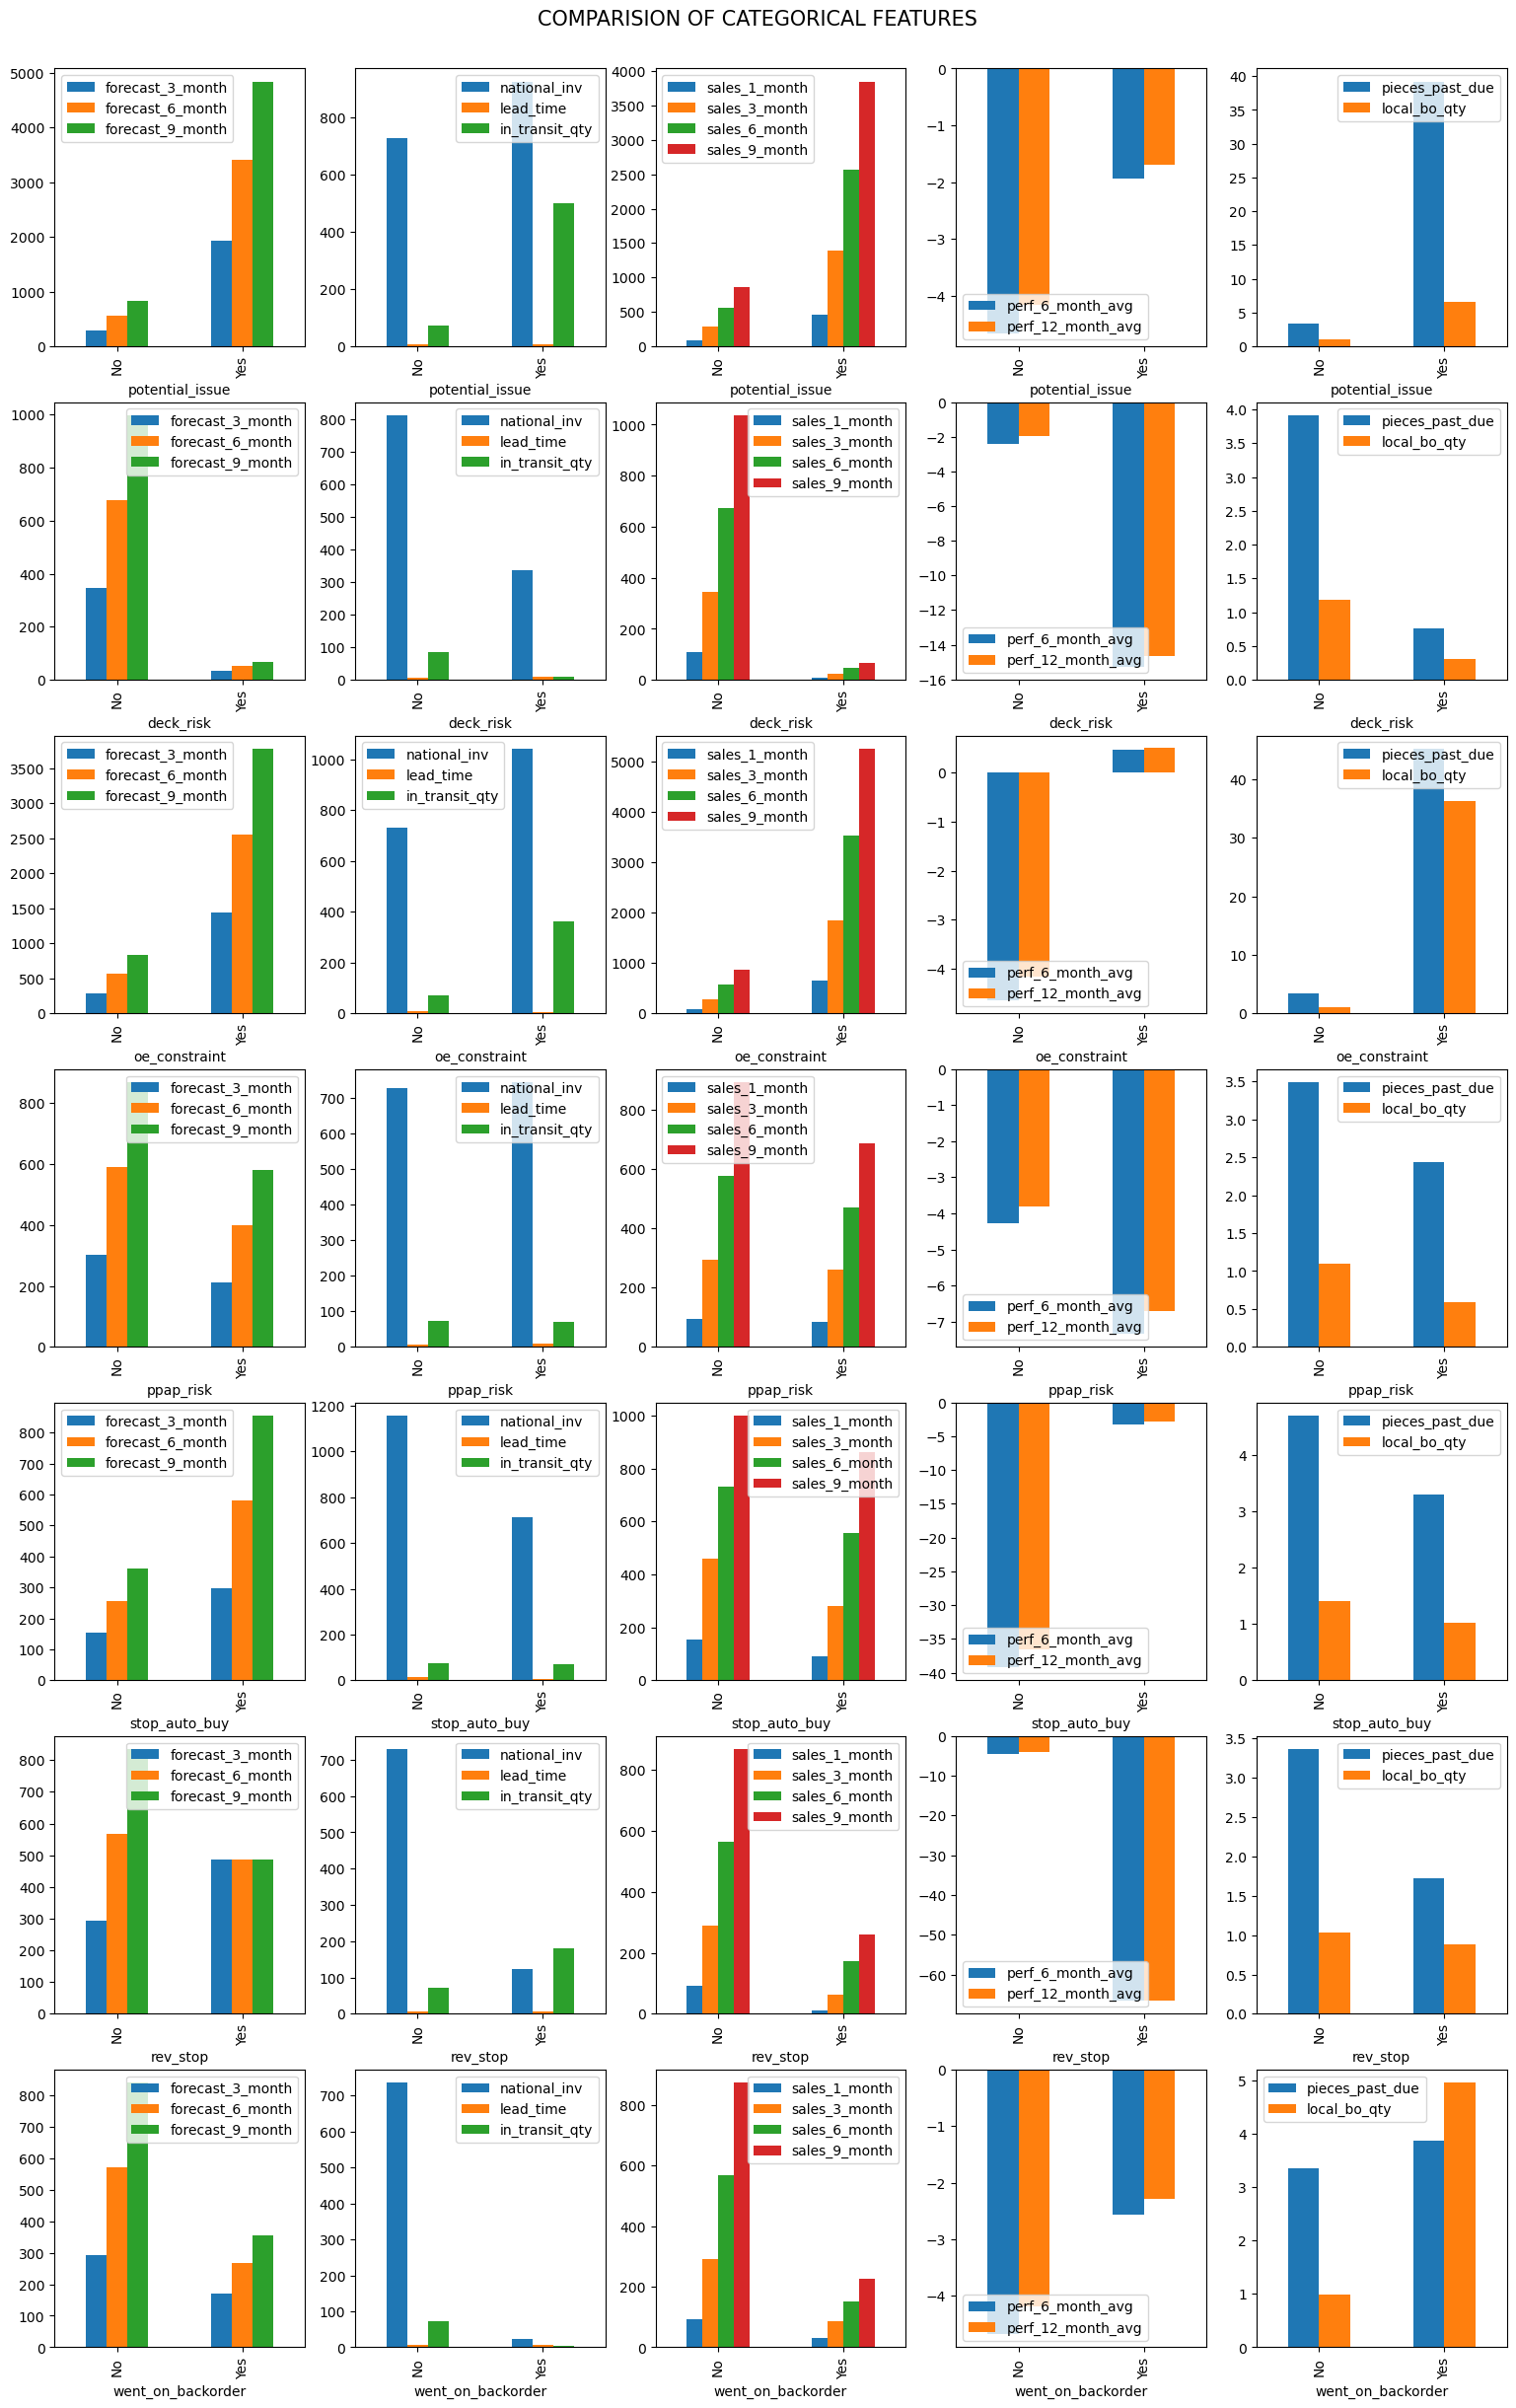

In [49]:
import matplotlib.pyplot as plt
objs = list(train_data.select_dtypes('object').columns)
num = list(train_data.select_dtypes('int').columns)
fl = list(train_data.select_dtypes('float').columns)
grup=[]
for i in objs:
    grup.append(train_data.groupby(i)[fl].mean())
cd = list(train_data.groupby(objs[0])[fl].mean().columns[3:6])
hd = list(train_data.groupby(objs[0])[fl].mean().columns[0:3])
yd = list(train_data.groupby(objs[0])[fl].mean().columns[6:10])
ye = list(train_data.groupby(objs[0])[fl].mean().columns[12:14])
yt = ['pieces_past_due','local_bo_qty']
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(19, 30))
for p,i in enumerate([cd,hd,yd,ye,yt]):
    for s in range(len(grup)):
        ax = axes[s,p]
        grup[s][i].plot(kind='bar', ax=ax)


fig.suptitle("COMPARISION OF CATEGORICAL FEATURES",y=0.9,fontsize=15)

#### Changing Yes/No values to boolean

In [39]:
train_data = train_data.map(lambda x: True if x=='Yes' else (False if x=='No' else x))

#### Checking for imbalance 

In [40]:
train_data['went_on_backorder'].value_counts()

went_on_backorder
False    1010034
True       10274
Name: count, dtype: int64

#### Downsampling Flase values to True values

In [41]:
from sklearn.utils import resample
minority=train_data[train_data['went_on_backorder']==True]
majority=train_data[train_data['went_on_backorder']==False]
majority_unsampled=resample(majority,replace=False,n_samples=len(minority))
train_data=pd.concat([minority,majority_unsampled])
train_data=train_data.sample(frac=1, random_state=42).reset_index(drop=True)
train_data['went_on_backorder'].value_counts()

went_on_backorder
True     10274
False    10274
Name: count, dtype: int64

#### Standardizing the data

In [12]:
for _ in train_data.columns:
    if train_data[_].dtype == np.float64:
        train_data[_] = (train_data[_]-np.mean(train_data[_]))/np.std(train_data[_])

#### Separating predictors and target 

In [13]:
X=train_data.drop(columns='went_on_backorder').to_numpy()
Y=train_data['went_on_backorder']

#### Loading the testing data

In [14]:
test_data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem2/RPL/Kaggle_Test_Dataset.csv')
test_data.head()

/var/folders/_t/p1thpgyj6yv2d7xmn803p8tw0000gn/T/ipykernel_23392/3788358664.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data=pd.read_csv('/Users/himanshugulechha/Desktop/MSc AI&ML/Sem2/RPL/Kaggle_Test_Dataset.csv')


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1,3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
2,3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3,3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
4,3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


#### Checking for NULL values

In [15]:
test_data.isnull().sum()

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

#### Replacing NULL with mean values

In [16]:
test_data['lead_time'].fillna(np.mean(test_data['lead_time']), inplace=True)

#### Dropping the rest NULL values, changing the index to SKU values and converting Yes/No values to boolean

In [17]:
test_data.dropna(inplace=True)
test_data.index = test_data.sku
test_data.drop('sku', axis=1, inplace=True)
test_data = test_data.map(lambda x: True if x=='Yes' else (False if x=='No' else x))


#### Standardising the testing data

In [18]:
for _ in test_data.columns:
    if test_data[_].dtype == np.float64:
        test_data[_] = (test_data[_]-np.mean(test_data[_]))/np.std(test_data[_])

#### Separating predictors and target from testing data

In [19]:
X_test=train_data.drop(columns='went_on_backorder').to_numpy()
y_test=train_data['went_on_backorder']

#### Fitting Bernoulli Naive Bayes, Support Vector Classifier, Logistic Regression, LSTM and Hybrid Model

##### Bernoulli Naive Bayes is a probabilistic classifier based on Bayes' Theorem, particularly effective for binary/Boolean features. It assumes features are independent given the class and calculates the probability of each class by multiplying the likelihood of the observed features.
##### SVC is a supervised learning algorithm used for classification tasks. It works by finding the optimal hyperplane that maximizes the margin between different classes. SVC is effective for high-dimensional spaces and is versatile with different kernel functions.
##### Logistic Regression is a linear model used for binary classification. It models the probability of the default class (often the positive class) as a logistic function of a linear combination of input features, providing interpretable coefficients and efficient training.
##### LSTM is a type of recurrent neural network (RNN) designed to handle sequential data and address the vanishing gradient problem. It maintains long-term dependencies by using gates to control the flow of information, making it suitable for time series prediction and tasks requiring memory.
##### The Hybrid model combines the strengths of RNN and LSTM layers to capture both sequential dependencies and long-term memory in data. The RNN layer processes sequences, while the LSTM layer handles long-term patterns, resulting in a powerful model for complex time series and classification tasks. This combination allows the model to efficiently learn from both short-term and long-term patterns, making it highly effective for predictive tasks in dynamic environments.

In [24]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, SimpleRNN, Dropout
import tensorflow as tf
X = np.asarray(X).astype(np.float32)
BNB=BernoulliNB().fit(X,Y)
BNB_pred=BNB.predict(X_test)
SVCM=SVC().fit(X,Y)
SVC_pred=SVCM.predict(X_test)
LR=LogisticRegression(max_iter=1000).fit(X,Y)
LR_pred=LR.predict(X_test)
model=Sequential()
model.add(LSTM(64,input_shape=(X.shape[1],1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X,Y,epochs=10,batch_size=32,validation_split=0.2,verbose=0)
X_test_tensor=tf.convert_to_tensor(X_test.reshape(X_test.shape[0],X_test.shape[1],1),dtype=tf.float32)
y_pred_prob=model.predict(X_test_tensor)
LSTM_pred=(y_pred_prob>0.5).astype(int)
hybridmodel=Sequential()
hybridmodel.add(SimpleRNN(32,return_sequences=True,input_shape=(X.shape[1],1)))
hybridmodel.add(Dropout(0.2))
hybridmodel.add(LSTM(64))
hybridmodel.add(Dropout(0.2))
hybridmodel.add(Dense(1,activation='sigmoid'))
hybridmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hybridmodel.fit(X,Y,epochs=10,batch_size=32,validation_split=0.2,verbose=0)
y_pred_prob1=hybridmodel.predict(X_test_tensor)
hybrid_pred=(y_pred_prob1>0.5).astype(int)

643/643 [==============================] - 1s 1ms/step


#### Comparing Accuracies

##### A confusion matrix is a table used to evaluate the performance of a classification model. It summarizes the correct and incorrect predictions by comparing the actual values with the predicted values. The matrix consists of four key terms:
##### True Positives (TP): Correctly predicted positive cases.
##### True Negatives (TN): Correctly predicted negative cases.
##### False Positives (FP): Incorrectly predicted as positive.
##### False Negatives (FN): Incorrectly predicted as negative.
##### Accuracy measures the proportion of correct predictions over the total number of predictions. It is calculated as:
##### Accuracy=(TP+TN)/(TP+TN+FP+FN) 
##### Accuracy is a useful metric when the classes are balanced, but can be misleading for imbalanced datasets.

<BarContainer object of 5 artists>

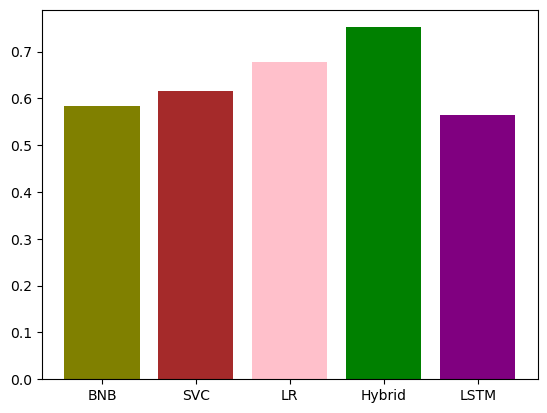

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,BNB_pred)
accuracy2=accuracy_score(y_test,SVC_pred)
accuracy3=accuracy_score(y_test,LR_pred)
accuracy4=accuracy_score(y_test,hybrid_pred)
accuracy5=accuracy_score(y_test,LSTM_pred)
name=['BNB','SVC','LR','Hybrid','LSTM']
scores=[accuracy1,accuracy2,accuracy3,accuracy4,accuracy5]
colors = ['olive','brown','pink','green','purple']
plt.bar(name,scores,color=colors)

#### Comparing Precision Scores

##### Precision is the ratio of true positive predictions to the total predicted positives. It reflects the model's ability to correctly identify positive cases and is calculated as:
##### Precision= TP/(TP+FP)
##### High precision indicates a low false positive rate.

<BarContainer object of 5 artists>

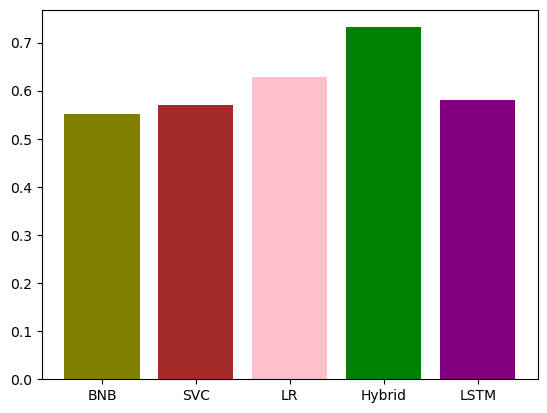

In [26]:
from sklearn.metrics import precision_score
precision1=precision_score(y_test,BNB_pred)
precision2=precision_score(y_test,SVC_pred)
precision3=precision_score(y_test,LR_pred)
precision4=precision_score(y_test,hybrid_pred)
precision5=precision_score(y_test,LSTM_pred)
precisions=[precision1,precision2,precision3,precision4,precision5]
plt.bar(name,precisions,color=colors)

#### Comparing Recall Scores

##### Recall, or sensitivity, is the ratio of true positive predictions to the total actual positives. It measures the model's ability to identify all relevant cases and is calculated as:
##### Recall=TP/(TP+FN)
##### High recall means that most of the actual positive cases are identified.

<BarContainer object of 5 artists>

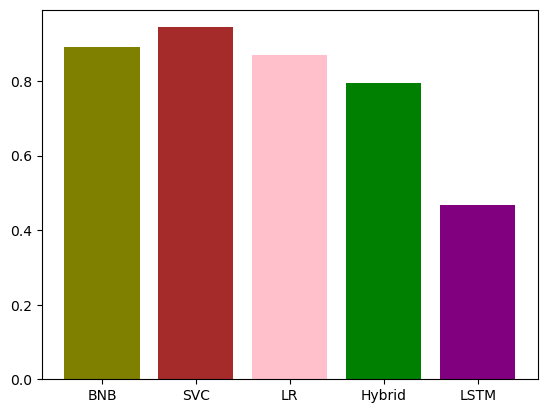

In [27]:
from sklearn.metrics import recall_score
recall1=recall_score(y_test,BNB_pred)
recall2=recall_score(y_test,SVC_pred)
recall3=recall_score(y_test,LR_pred)
recall4=recall_score(y_test,hybrid_pred)
recall5=recall_score(y_test,LSTM_pred)
recalls=[recall1,recall2,recall3,recall4,recall5]
plt.bar(name,recalls,color=colors)

#### Evaluating F-1 Score

##### The F1-score is the harmonic mean of precision and recall, providing a single metric that balances both concerns. It is calculated as:
##### F1-score=2*((Precision*Recall)/(Precision+Recall))
##### The F1-score is useful when you need to balance precision and recall.

<BarContainer object of 5 artists>

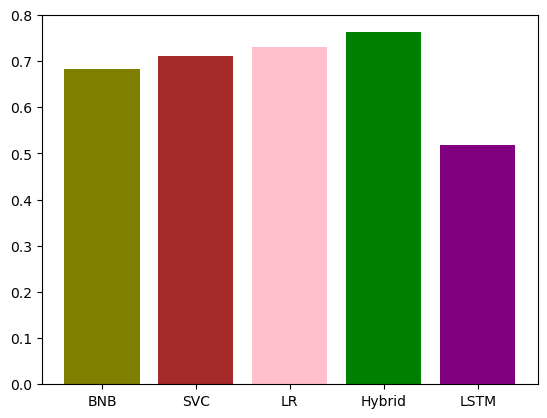

In [28]:
from sklearn.metrics import f1_score
f1_1=f1_score(y_test,BNB_pred)
f1_2=f1_score(y_test,SVC_pred)
f1_3=f1_score(y_test,LR_pred)
f1_4=f1_score(y_test,hybrid_pred)
f1_5=f1_score(y_test,LSTM_pred)
f1_scores = [f1_1,f1_2,f1_3,f1_4,f1_5]
plt.bar(name,f1_scores,color=colors)

#### Comparing ROC AUC Scores

##### The ROC (Receiver Operating Characteristic) curve plots the true positive rate (recall) against the false positive rate (1-specificity) at various threshold settings. The AUC (Area Under the Curve) measures the model's ability to discriminate between classes. A higher AUC indicates better model performance.

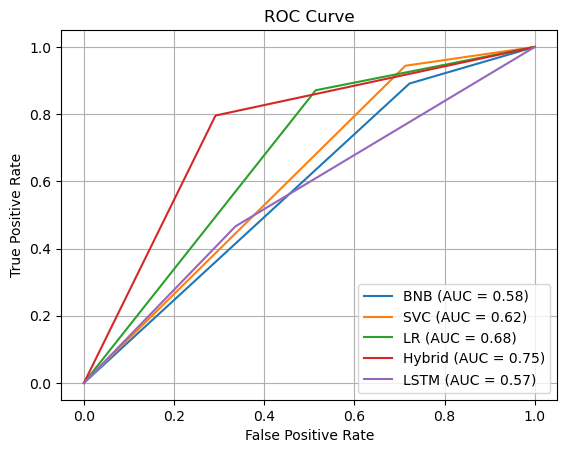

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1,tpr_model1,_=roc_curve(y_test,BNB_pred)
roc_auc_model1=roc_auc_score(y_test,BNB_pred)
fpr_model2,tpr_model2,_=roc_curve(y_test,SVC_pred)
roc_auc_model2=roc_auc_score(y_test,SVC_pred)
fpr_model3,tpr_model3,_=roc_curve(y_test,LR_pred)
roc_auc_model3=roc_auc_score(y_test,LR_pred)
fpr_model4,tpr_model4,_=roc_curve(y_test,hybrid_pred)
roc_auc_model4=roc_auc_score(y_test,hybrid_pred)
fpr_model5,tpr_model5,_=roc_curve(y_test,LSTM_pred)
roc_auc_model5=roc_auc_score(y_test,LSTM_pred)
plt.plot(fpr_model1, tpr_model1, label='BNB (AUC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='SVC (AUC = {:.2f})'.format(roc_auc_model2))
plt.plot(fpr_model3, tpr_model3, label='LR (AUC = {:.2f})'.format(roc_auc_model3))
plt.plot(fpr_model4, tpr_model4, label='Hybrid (AUC = {:.2f})'.format(roc_auc_model4))
plt.plot(fpr_model5, tpr_model5, label='LSTM (AUC = {:.2f})'.format(roc_auc_model5))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

##### The evaluation of the models based on key metrics such as accuracy, precision, recall, F1-score, and AUC-ROC revealed varying levels of performance across the techniques. The Hybrid model demonstrated the most balanced and robust performance, excelling across the majority of the metrics. Logistic Regression followed with strong, consistent results. SVC and Bernoulli Naive Bayes offered moderate effectiveness, while the LSTM model, although capable, showed limitations in comparison, particularly in handling the dataset and maintaining prediction accuracy. This analysis underscores the importance of selecting the appropriate model for specific data characteristics and tasks.

### END